<a href="https://colab.research.google.com/github/aoc-ptctech/allinone2022/blob/main/jcplessis/Day_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
class Rope:
  head = None
  tail = None
  last_tail_positions = None

  def __init__(self, tails_count=1):
    self.head = (0, 0)
    self.tails = [(0, 0)]*tails_count
    self.last_tail_positions = {self.tails[-1]}

  def count_tail_positions(self):
    return len(self.last_tail_positions)

  def update_tail(self):
    current_knot = self.head
    for i in range(len(self.tails)):
      next_knot = self.tails[i]
      dx = current_knot[0] - next_knot[0] 
      dy = current_knot[1] - next_knot[1]
      if dx in (2, -2) and dy in (2, -2):
        next_knot = (next_knot[0] + dx/2, next_knot[1] + dy/2)
      elif dx in (2, -2):
        next_knot = (next_knot[0] + dx/2, next_knot[1] + dy)
      elif dy in (2, -2):
        next_knot = (next_knot[0] + dx, next_knot[1] + dy/2)
      self.tails[i] = next_knot
      current_knot = next_knot
    
    self.last_tail_positions.add(self.tails[-1])

  def move(self, direction):
    dx, dy = {
        "R" : (1, 0),
        "L" : (-1, 0),
        "U" : (0, -1),
        "D" : (0, 1),
    }[direction]
    self.head = (self.head[0] + dx, self.head[1] + dy)
    self.update_tail()

  def print_tail_track(self, min_x, max_x, min_y, max_y):
    for y in range(min_y, max_y):
      for x in range(min_x, max_x):
        if (x,y) in self.last_tail_positions:
          print("#", end="")
        else:
          print(".", end="")
      print()

  def print_board(self, min_x, max_x, min_y, max_y):
    for y in range(min_y, max_y):
      for x in range(min_x, max_x):
        char = "."
        if(0,0) == (x,y):
          char = "s"
        for i in range(len(self.tails), 0, -1):
          if self.tails[i-1] == (x,y):
            char=str(i)
        if self.head == (x,y):
          char="H"
        
        print(char, end="")
        
      print()


  def simulate(self, input):
    for line in input.split("\n"):
      direction, number = line.split(" ")
      for i in range(int(number)):
        self.move(direction)


In [25]:
import unittest

example = """R 4
U 4
L 3
D 1
R 4
D 1
L 5
R 2"""

long_example = """R 5
U 8
L 8
D 3
R 17
D 10
L 25
U 20"""

class TestAcceptance(unittest.TestCase):

    def test_init_rope(self):
      rope = Rope()
      self.assertEqual((0,0), rope.head)
      self.assertEqual((0,0), rope.tails[0])
      self.assertEqual(1, rope.count_tail_positions())

    def test_simple_move(self):
      rope = Rope()
      rope.move("R")
      self.assertEqual((1,0), rope.head)
      self.assertEqual((0,0), rope.tails[0])
      rope.move("U")
      self.assertEqual((1,-1), rope.head)
      self.assertEqual((0,0), rope.tails[0])
          
    def test_update_tail(self):
      rope = Rope()
      rope.move("R")
      rope.move("R")
      self.assertEqual((2,0), rope.head)
      self.assertEqual((1,0), rope.tails[0])
      self.assertEqual(2, rope.count_tail_positions())
      rope.move("U")
      rope.move("U")
      self.assertEqual((2,-2), rope.head)
      self.assertEqual((2,-1), rope.tails[0])
      self.assertEqual(3, rope.count_tail_positions())

    def test_simulate_rope(self):
      rope = Rope()
      rope.simulate(example)
      self.assertEqual(13, rope.count_tail_positions())

    def test_simulate_long_rope(self):
      rope = Rope(9)
      rope.simulate(example)
      self.assertEqual(1, rope.count_tail_positions())

    def test_simulate_long_example_long_rope(self):
      rope = Rope(9)
      rope.simulate(long_example)
      self.assertEqual(36, rope.count_tail_positions())
      rope.print_tail_track(-11, 11, -11, 11)

unittest.main(argv=[''], verbosity=2, exit=False)

test_init_rope (__main__.TestAcceptance) ... ok
test_simple_move (__main__.TestAcceptance) ... ok
test_simulate_long_example_long_rope (__main__.TestAcceptance) ... ok
test_simulate_long_rope (__main__.TestAcceptance) ... ok
test_simulate_rope (__main__.TestAcceptance) ... ok
test_update_tail (__main__.TestAcceptance) ... 

......................
......................
......................
......................
......................
#.....................
#.............###.....
#............#...#....
.#..........#.....#...
..#..........#.....#..
...#........#.......#.
....#......#.........#
.....#..............#.
......#............#..
.......#..........#...
........#........#....
.........########.....
......................
......................
......................
......................
......................


ok

----------------------------------------------------------------------
Ran 6 tests in 0.223s

OK


In [26]:
#@title Define my input
input = """L 1
D 2
U 1
L 1
R 2
L 2
U 1
D 2
R 2
L 2
U 1
D 2
R 1
D 2
L 2
D 1
L 2
R 1
U 2
R 2
U 2
L 2
U 1
L 2
R 1
D 1
R 1
L 1
R 1
L 1
R 1
U 1
R 1
L 1
D 2
L 2
D 2
L 1
R 1
D 1
R 1
D 2
L 1
D 2
L 1
R 2
D 2
R 2
U 1
R 1
U 2
R 1
U 2
R 1
D 2
L 1
D 2
U 1
R 2
D 2
L 1
U 2
R 2
L 2
D 2
L 2
D 2
R 1
U 2
L 2
U 1
R 1
D 1
L 1
D 1
U 1
D 2
L 1
R 1
D 1
R 1
L 2
R 1
L 1
U 2
D 2
U 1
L 1
U 2
R 1
D 2
U 1
D 1
L 1
D 2
U 2
D 1
U 2
R 2
L 2
D 1
R 2
D 1
L 2
D 2
L 2
R 1
L 1
R 2
L 2
R 2
U 1
R 1
U 3
D 2
U 3
L 1
R 1
U 3
D 1
L 1
R 3
D 2
L 3
R 3
D 2
R 2
U 3
R 3
U 3
R 2
U 3
D 2
L 3
U 3
R 1
U 1
R 3
U 2
L 1
R 1
U 1
L 3
R 3
U 3
D 2
U 1
L 1
D 3
R 3
U 2
L 1
R 3
L 3
D 3
U 3
R 2
L 1
U 1
L 3
R 3
U 1
R 3
L 2
R 2
D 3
U 1
D 3
U 3
R 3
D 2
L 2
U 2
D 3
L 3
U 3
R 3
D 2
R 3
U 1
D 1
U 2
R 1
D 3
R 1
L 2
U 3
D 1
L 1
D 3
U 2
L 3
R 3
L 1
D 2
L 3
U 3
L 1
D 2
L 1
D 1
L 2
U 2
D 2
U 2
L 2
D 3
L 3
D 3
R 3
U 1
R 3
U 1
R 3
D 3
U 2
D 1
R 2
L 2
R 2
D 2
R 2
D 1
R 3
D 1
U 2
L 4
D 1
L 2
R 1
U 1
D 3
U 4
D 2
L 3
R 2
D 3
R 4
U 1
D 1
U 1
L 3
U 1
D 3
R 3
D 3
R 1
U 4
R 1
U 1
R 2
L 4
U 3
D 2
R 2
D 1
U 2
L 3
D 4
U 4
D 4
U 4
L 3
U 3
D 3
R 3
L 4
R 3
D 2
L 2
R 1
D 1
L 4
R 3
D 2
U 1
L 2
R 1
U 2
L 4
R 4
L 3
U 4
D 2
U 4
D 4
L 1
U 4
L 3
U 2
D 2
R 2
D 3
R 4
D 1
U 4
D 1
U 1
D 3
L 3
D 2
R 4
D 4
L 2
U 2
L 3
R 4
L 2
R 2
D 3
L 2
D 4
U 3
D 4
L 3
R 2
U 3
D 4
R 2
U 3
R 1
D 1
R 1
D 2
R 3
D 4
L 1
U 3
L 3
U 4
R 1
U 3
L 4
D 5
R 2
D 2
U 2
D 1
R 4
D 1
L 4
D 4
L 1
R 1
D 4
U 4
L 1
D 4
L 4
U 5
R 4
D 4
R 5
U 3
L 5
U 1
R 4
L 1
R 3
L 2
D 5
R 1
D 4
R 2
U 5
L 3
R 5
U 4
R 1
D 4
U 3
R 3
L 3
R 3
L 3
U 2
D 4
U 2
L 3
D 2
R 3
U 3
D 2
U 1
R 5
L 4
R 4
L 4
D 3
R 3
U 2
R 1
D 3
U 3
D 2
L 1
D 2
U 1
L 3
U 5
L 1
D 1
U 5
D 3
U 4
D 4
L 5
R 3
D 4
R 2
L 1
D 1
L 3
U 3
R 1
L 2
D 4
L 5
U 1
L 4
R 4
U 2
D 1
R 5
D 3
U 2
D 3
U 4
D 4
U 1
L 2
D 4
L 3
U 4
L 1
R 1
L 2
R 3
L 2
U 1
D 2
U 5
R 2
D 4
U 1
D 4
U 4
D 5
L 6
D 3
U 2
D 1
L 3
U 4
R 4
D 4
R 3
L 4
U 6
D 1
U 4
R 2
L 1
D 2
U 4
D 5
U 3
D 6
L 1
U 3
L 1
U 1
D 6
L 3
U 6
L 3
D 6
L 1
D 6
U 2
D 5
U 2
L 5
D 3
U 2
D 1
U 6
L 1
D 4
L 6
R 3
D 3
L 3
D 2
R 3
D 5
R 3
D 2
L 1
R 4
L 6
D 4
R 4
U 1
R 6
D 3
U 1
R 1
D 1
L 3
D 1
R 3
U 5
L 5
D 2
L 3
D 2
L 5
U 3
L 1
U 5
L 3
D 4
U 5
D 1
L 6
D 1
R 6
U 4
R 1
D 1
L 2
U 5
R 2
U 6
L 5
U 5
L 6
U 6
D 3
L 1
R 3
L 3
U 4
R 5
L 6
D 5
L 4
R 6
L 6
R 5
D 2
R 4
L 2
U 1
L 3
U 6
L 4
D 6
U 6
D 4
L 2
R 7
U 4
R 1
L 5
D 2
R 3
U 4
L 5
U 7
L 2
R 1
U 4
L 2
R 5
L 6
D 5
L 4
U 5
L 7
U 1
L 5
U 1
L 5
D 3
U 3
R 7
U 7
R 7
L 6
D 4
U 7
R 2
D 3
R 3
U 4
D 4
U 5
D 6
L 5
R 6
U 4
R 6
D 1
R 4
U 1
D 1
R 1
L 4
U 5
L 3
D 5
L 5
D 3
U 2
R 5
D 7
U 7
D 1
U 5
R 6
U 4
R 6
L 7
U 5
R 1
L 1
U 1
R 1
D 7
L 2
U 5
R 4
U 2
D 6
U 6
L 7
U 3
D 2
L 3
R 3
U 2
L 1
R 2
L 5
D 6
R 2
U 6
L 1
D 7
R 4
D 3
L 2
U 5
R 4
L 2
R 5
D 1
U 1
R 6
D 5
U 6
R 2
U 2
L 2
U 6
L 5
U 1
L 1
D 7
R 6
U 5
D 3
L 5
R 3
D 3
U 2
D 7
U 7
L 1
D 5
L 5
U 4
L 5
D 1
U 6
D 5
L 7
D 8
U 8
R 6
U 5
D 8
U 1
R 2
U 6
D 6
L 4
D 2
R 3
U 7
R 4
U 4
R 5
U 6
R 1
U 4
R 1
U 4
D 5
U 3
L 7
U 8
R 1
D 1
U 8
L 8
U 3
L 1
D 4
R 2
D 4
U 2
L 4
D 8
R 7
D 5
U 4
L 5
U 5
D 8
R 8
U 3
R 8
L 4
U 5
R 6
U 7
D 3
L 1
U 5
D 2
R 5
U 4
D 8
L 4
R 1
D 6
R 1
L 6
D 6
L 7
D 4
L 4
D 8
R 8
D 7
L 6
R 1
D 4
L 5
D 2
U 3
D 2
U 6
R 1
U 7
D 7
R 2
U 7
D 5
L 6
U 1
L 8
U 1
L 1
R 9
D 1
U 6
D 5
L 1
R 9
D 2
L 2
D 6
U 6
D 7
L 3
R 5
L 6
U 5
R 1
U 1
R 3
L 9
U 6
L 6
U 2
D 6
R 9
U 4
D 3
L 8
U 5
D 7
L 1
U 7
R 1
L 6
D 8
L 5
R 7
L 2
R 6
L 5
D 3
L 8
D 7
U 8
R 6
L 6
D 7
U 8
D 1
U 2
D 5
U 7
D 8
L 1
D 1
L 1
U 1
R 3
L 5
R 9
D 2
L 8
R 6
D 6
U 1
R 7
L 4
U 4
D 1
L 5
U 2
R 9
D 7
U 8
L 8
R 4
D 1
L 1
U 7
R 8
L 3
D 2
U 8
R 1
D 5
L 1
R 7
D 6
R 2
U 9
D 2
L 5
U 4
D 9
L 7
D 9
L 2
U 9
D 5
L 7
D 6
U 5
D 9
R 3
U 8
L 7
U 1
L 3
U 3
D 1
L 6
R 9
U 2
L 7
R 9
U 5
R 2
L 3
R 4
D 9
L 4
R 9
U 4
L 10
R 9
D 9
U 10
L 2
R 4
U 4
R 9
D 2
R 1
L 4
R 7
D 3
L 6
U 1
L 9
D 6
U 10
D 1
R 10
D 9
L 6
D 10
U 3
R 10
L 8
U 9
D 1
L 1
D 10
L 1
D 5
L 9
U 3
L 4
U 4
D 1
U 3
R 7
L 3
R 3
L 3
R 8
D 9
R 4
L 6
D 7
R 10
U 6
R 2
D 2
L 3
R 9
D 9
U 7
D 2
R 6
U 10
R 8
U 5
R 5
U 10
R 6
U 7
L 7
U 7
D 4
L 9
U 2
R 7
L 8
R 4
L 1
U 9
R 8
D 4
R 5
D 4
L 1
D 10
R 8
D 10
U 9
D 3
R 1
U 10
R 1
D 10
R 1
L 6
D 3
U 8
R 4
U 9
D 8
U 3
D 2
R 3
L 5
U 4
L 3
R 4
D 6
L 9
R 1
D 9
R 2
D 11
R 8
D 5
R 8
L 2
D 2
L 7
U 11
D 10
L 6
R 2
U 9
L 10
D 4
L 5
R 7
D 4
L 1
U 3
L 9
D 7
R 4
D 10
L 5
U 9
L 10
D 5
L 11
R 11
U 8
R 11
U 2
R 7
L 10
R 2
D 8
L 2
D 8
R 11
L 6
R 3
L 2
U 2
R 2
U 3
D 3
U 5
L 8
U 9
R 10
D 1
U 4
D 8
R 3
D 11
R 4
D 4
R 7
U 6
L 11
U 11
D 8
L 5
R 2
L 11
U 7
D 5
U 5
D 9
L 2
U 3
R 10
U 1
R 1
L 11
D 3
L 5
R 2
L 10
R 4
L 1
U 1
L 4
R 5
U 2
D 6
R 11
U 8
D 5
R 5
D 3
L 2
U 7
D 10
L 11
D 10
U 11
R 8
L 2
D 9
R 9
L 11
R 10
U 3
R 4
L 5
R 12
U 5
D 5
L 6
D 11
R 8
D 12
U 6
L 10
R 9
U 1
L 12
D 1
R 8
U 9
D 9
R 6
D 3
L 1
R 3
L 8
R 6
U 12
L 1
U 8
D 7
U 5
D 12
L 4
R 11
U 9
D 12
R 8
D 2
R 7
U 8
R 10
U 3
R 4
D 4
U 9
R 7
L 9
R 7
U 8
L 9
U 6
R 4
L 11
D 11
R 6
U 2
D 1
R 2
L 2
D 11
R 5
U 1
R 1
D 3
U 2
L 3
U 12
R 10
U 12
R 9
D 11
U 9
L 2
R 7
U 5
R 7
U 9
R 3
D 4
L 9
D 4
R 12
L 3
U 12
L 9
U 3
L 11
R 7
U 11
D 2
L 11
R 2
L 12
U 10
L 6
R 8
D 6
R 12
L 7
R 4
U 5
D 10
R 8
L 11
D 4
U 1
R 9
U 12
D 3
L 10
R 11
U 1
L 5
U 11
L 7
U 1
D 13
U 10
L 12
U 9
D 8
L 5
R 4
L 1
R 2
L 7
D 1
L 11
U 9
R 5
D 12
L 4
U 7
L 6
R 7
U 1
L 7
U 2
D 4
R 4
D 7
L 3
D 9
U 3
D 3
U 12
R 2
L 12
R 9
L 8
D 10
U 1
R 11
L 13
U 1
D 3
U 12
L 3
R 7
L 7
D 7
U 7
D 7
U 10
D 1
L 7
D 11
R 3
D 6
R 9
D 5
U 12
D 6
R 8
D 3
R 7
L 6
D 10
U 8
R 9
D 4
R 9
D 2
U 4
R 4
U 7
L 12
R 2
D 10
U 13
R 12
L 12
D 1
R 11
L 2
U 13
L 12
D 7
L 2
U 4
L 4
D 8
L 9
R 3
D 4
L 9
U 9
L 9
R 10
L 4
R 4
U 10
L 11
D 8
U 8
L 13
R 1
L 8
U 13
L 9
U 1
R 13
U 7
L 3
R 8
L 1
D 5
R 7
U 8
D 5
L 12
R 11
U 11
D 10
U 5
R 6
D 11
R 1
D 1
R 9
L 8
D 4
L 11
U 9
D 4
U 3
D 13
U 13
L 6
D 6
R 11
L 9
U 3
R 7
D 9
R 5
L 9
D 14
R 8
L 14
R 6
L 6
U 6
R 7
L 11
R 1
L 6
D 10
R 1
D 14
R 12
U 4
R 2
L 9
R 14
L 3
D 9
U 10
R 11
L 5
R 14
U 3
D 8
R 9
L 13
U 4
L 2
R 4
D 6
L 13
D 4
R 2
L 2
D 10
L 10
R 4
D 2
R 2
U 6
D 7
U 12
R 5
U 13
L 6
U 12
L 3
D 11
R 3
L 7
U 11
D 4
L 13
U 14
R 10
D 12
U 2
L 1
U 12
D 6
U 2
R 12
L 3
D 9
U 9
R 14
L 12
R 5
L 11
R 11
L 5
R 2
L 4
D 8
U 3
R 4
D 12
R 10
L 10
D 10
U 10
R 9
L 14
R 3
L 1
D 1
R 15
D 15
R 12
L 15
D 12
L 10
R 3
U 14
D 4
U 7
R 11
L 10
U 4
D 15
L 3
U 1
R 2
L 15
U 6
L 6
D 3
L 14
D 12
U 1
L 15
R 13
U 7
D 6
R 11
U 7
L 2
D 11
L 1
R 7
D 1
L 4
R 11
U 5
L 4
R 13
U 1
D 4
L 6
R 10
L 15
U 7
D 9
L 10
R 8
U 10
D 8
L 14
D 15
R 14
U 10
D 4
U 6
D 2
R 6
L 6
D 4
U 12
L 3
R 6
U 9
R 3
U 11
R 3
U 15
D 1
U 2
D 3
U 11
L 3
U 2
L 14
D 3
R 9
D 5
L 10
U 7
L 6
D 8
L 8
U 8
L 14
R 9
L 14
U 10
L 8
U 5
L 2
U 4
D 5
R 2
L 1
U 14
R 3
L 4
U 9
D 7
U 14
D 11
R 9
U 5
R 8
L 5
U 3
D 8
R 8
L 11
R 7
L 3
D 16
L 11
U 7
D 6
R 5
L 4
U 9
L 12
R 9
L 10
D 13
L 3
D 13
U 6
R 14
U 2
L 5
R 4
L 15
U 9
D 5
L 6
R 7
U 10
L 3
D 5
U 8
D 12
L 11
U 14
D 12
U 2
D 9
U 11
D 5
L 5
R 10
L 14
U 1
R 8
D 5
R 6
U 6
L 3
U 11
L 8
R 3
U 5
L 1
R 16
D 10
U 12
R 11
D 2
U 4
D 15
U 16
D 2
L 9
R 10
L 3
U 8
R 13
U 11
D 12
U 15
D 1
L 14
R 3
U 13
D 7
R 15
L 3
R 1
U 7
R 6
D 12
L 2
R 13
D 3
R 6
D 10
U 2
R 4
D 12
L 7
R 7
L 8
R 14
L 15
D 8
L 6
U 14
L 16
U 10
D 7
R 6
D 12
R 16
U 11
R 2
U 10
L 1
R 6
U 14
D 13
U 7
L 10
D 4
L 7
R 11
U 17
D 6
U 6
R 6
U 12
L 16
U 5
R 15
L 17
D 13
U 12
L 1
D 7
L 13
R 7
U 2
L 5
U 12
R 10
U 7
R 11
U 17
D 15
U 15
L 10
D 3
L 15
U 8
R 8
D 10
L 9
U 6
R 9
L 1
U 5
R 6
L 11
D 17
L 7
U 3
D 17
R 17
U 8
L 15
R 3
D 2
U 17
L 1
R 13
U 13
L 10
R 2
D 12
L 12
R 13
L 14
R 16
D 12
R 4
U 14
L 15
R 10
D 7
R 12
U 6
L 8
U 7
R 1
D 3
R 3
L 11
D 2
R 15
U 17
L 13
U 17
D 4
U 11
L 17
D 12
R 3
L 12
U 8
D 2
L 14
U 16
D 6
U 7
L 12
R 17
L 7
D 1
L 16
D 16
R 17
D 5
U 16
D 2
L 13
U 9
D 13
R 3
U 1
D 12
R 4
D 11
L 8
D 8
R 13
D 16
R 1
D 10
R 18
U 6
D 4
U 17
R 12
L 14
U 5
L 15
U 18
R 4
D 17
L 4
R 18
U 18
D 4
L 1
U 4
L 2
U 17
R 16
L 7
U 10
R 11
U 9
R 11
L 16
U 3
R 3
L 18
U 8
R 1
U 1
L 5
U 5
D 7
L 1
R 2
U 16
R 17
D 4
U 16
L 12
R 3
L 16
D 5
U 5
R 18
L 7
U 1
L 7
U 16
R 14
L 4
R 13
L 3
U 4
L 11
U 3
L 12
U 16
L 14
U 3
L 9
R 18
D 8
L 15
R 10
D 2
L 13
D 11
U 4
L 13
D 7
L 12
U 7
D 17
U 9
D 5
L 10
R 2
D 7
L 14
U 10
D 17
L 3
R 17
U 16
D 13
R 13
U 14
R 9
L 3
U 14
L 7
U 4
D 1
R 18
U 11
D 9
U 8
R 15
L 5
D 9
L 2
D 18
U 12
D 3
U 14
D 9
U 13
R 16
U 8
R 16
U 4
L 8
D 14
R 15
D 6
R 17
U 6
D 1
L 2
U 9
D 15
L 7
D 3
R 1
L 1
R 17
D 12
R 19
U 4
R 19
L 2
D 17
U 11
D 1
L 9
R 18
L 7
D 13
U 6
D 16
L 6
R 13
U 12
R 1
L 2
U 8
L 16
R 10
D 15
R 5
L 1
U 5
R 18
U 1
R 4
U 14
R 3
L 4
U 13
D 14
L 10
D 7
U 3
R 17
L 19
R 1
D 12
L 9
U 19
D 19
L 5
R 10
L 14
U 15
D 19
U 18
D 14
R 11
U 8
R 2
U 16
L 17
D 6
L 1
D 10
R 18
U 5
R 14
U 10
D 6
L 17
D 6
U 7
R 14
L 1
U 3
D 3
R 18
D 1
L 6
D 18
L 2
R 10
L 9
R 10
L 14
R 15
U 10"""


In [27]:

rope = Rope()
rope.simulate(input)

print(f"After simulating my rope, the tail has moved on {rope.count_tail_positions()} different locations")

rope = Rope(9)
rope.simulate(input)

print(f"After simulating my long (9 tails) rope, the tail has moved on {rope.count_tail_positions()} different locations")


After simulating my rope, the tail has moved on 6018 different locations
After simulating my long (9 tails) rope, the tail has moved on 2619 different locations


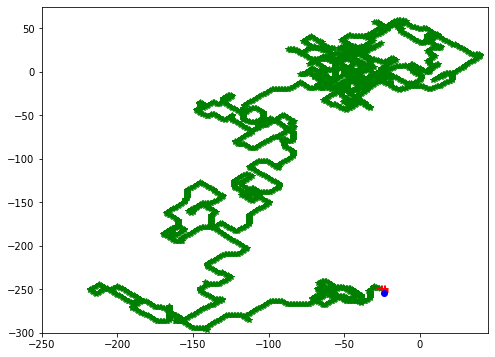

In [42]:
import math

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

from IPython.display import HTML


fig = plt.figure(figsize=(8,6))
ax = plt.axes()
ax.set_xlim(-10,30)
ax.set_ylim(-10,50)


rope = Rope(9)
trail_plot, = ax.plot([], [], "g*")
tail_plot, = ax.plot([], [], "r+")
head_plot, = ax.plot(rope.head[0], rope.head[1], "bo")


def frame(w):
    rope.simulate(input.split("\n")[w])
    
    tx = []
    ty = []
    for tail_position in rope.last_tail_positions:
      tx.append(tail_position[0])  
      ty.append(tail_position[1])
    trail_plot.set_data(tx, ty)
    
    tx = []
    ty = []
    for tail in rope.tails:
      tx.append(tail[0])  
      ty.append(tail[1])
    tail_plot.set_data(tx, ty)
    head_plot.set_data(rope.head[0], rope.head[1])

    if w == 400:
      ax.set_xlim(-100,45)
      ax.set_ylim(-75,75)

    if w == 1500:
      ax.set_xlim(-250,45)
      ax.set_ylim(-300,75)

anim = animation.FuncAnimation(fig, frame, frames=len(input.split("\n")), interval=25)
HTML(anim.to_html5_video())